In [17]:
# Importando Modulos Para Tratamento de Dados.

import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Importando os Dados Coletados Pelo Web Scrapping Para o DataFrame.

df = pd.read_csv('../bases originais/funds.csv')

# Analisando Atributos do DataFrame.

- ## Shape

In [19]:
# Exibindo O Tamanho De Linhas e Colunas do DataFrame.

print(f'Tamanho DataFrame:\n\n Linhas: {df.shape[0]}\n Colunas: {df.shape[1]}')

Tamanho DataFrame:

 Linhas: 320
 Colunas: 11


- ## Count

In [20]:
# Exibindo a Quantidade de Registros Por Colunas do DataFrame.

print('Quantidade de Registros:\n')

print(df.count())

Quantidade de Registros:

code                   320
sector                 303
currentPrice           312
dailyLiquidity         312
dividend               320
dividendYield          315
dividendYieldAnnual    288
priceVariation         315
pvp                    293
physicalVacancy        121
financialVacancy        28
dtype: int64


- ## Count Missing

In [21]:
# Exibindo o Total de Dados Nulos do DataFrame.

print('Quantidade de Registros Vazios:\n')

print(df.isna().sum())

Quantidade de Registros Vazios:

code                     0
sector                  17
currentPrice             8
dailyLiquidity           8
dividend                 0
dividendYield            5
dividendYieldAnnual     32
priceVariation           5
pvp                     27
physicalVacancy        199
financialVacancy       292
dtype: int64


- ## Types

In [22]:
# Exibindo os Tipos de Dados do DataFrame.

print('Tipos de Dados:\n')

print(df.dtypes)

Tipos de Dados:

code                    object
sector                  object
currentPrice            object
dailyLiquidity         float64
dividend                object
dividendYield           object
dividendYieldAnnual     object
priceVariation          object
pvp                     object
physicalVacancy         object
financialVacancy        object
dtype: object


# Tratando Atributos do DataFrame.

- # Descarte de Registros Duplicados.
- - # Principais motivos para o descarte de dados duplicados:

- - - Precisão: Dados duplicados podem levar a uma supervalorização da importância de um determinado valor ou observação.
- - - Eficiência: Quando há muitos dados duplicados, a manipulação desses dados tende a se torna mais lenta e a consumir mais recursos computacionais do que o necessário.
- - - Consistência: Dados duplicados podem levar a inconsistências nos resultados finais e diminui a garantia que as informações estejam corretas e coerentes.

In [23]:
# Descartando Dados Duplicados.

# Cria um Novo DataFrame Sem Duplicatas.
dfClean = df.drop_duplicates(keep=False).copy()

print(f'Quantidade De Registros Removidos: \n\n {len(df) - len(dfClean)}')

dfClean.head()

Quantidade De Registros Removidos: 

 0


,code,sector,currentPrice,dailyLiquidity,dividend,dividendYield,dividendYieldAnnual,priceVariation,pvp,physicalVacancy,financialVacancy
0,AAZQ11,NaN,"R$ 9,38",62901.0,"R$ 0,15","1,58%","4,48%","-1,45%","0,98",NaN,NaN
1,ABCP11,Shoppings,"R$ 64,39",332.0,"R$ 0,50","0,78%","2,31%","-0,82%","0,70","7,50%",NaN
2,AFHI11,Títulos e Val. Mob.,"R$ 92,80",3753.0,"R$ 1,06","1,12%","2,24%","0,57%","0,98",NaN,NaN
3,AGRX11,NaN,"R$ 10,86",4689.0,"R$ 0,16","1,48%","4,72%","1,12%",NaN,NaN,NaN
4,AIEC11,Lajes Corporativas,"R$ 60,47",3209.0,"R$ 0,76","1,27%","2,76%","-2,70%","0,64","0,00%",NaN


- # Descarte de Atributos Definidos Como Irrelevantes.
- - # Atributos Descartados:

- - - (physicalVacancy): Devido ao fato de que mais de 60% do seus registros estão nulos, optamos pelo descarte do atributo.
- - - (financialVacancy): Devido ao fato de que mais de 90% do seus registros estão nulos, optamos pelo descarte do atributo.

&nbsp;

- Devido ao fato de que alguns valores estão vazios ou não são uteis para o processamento, decidimos pelo descarte dos mesmos.

In [24]:
# Descarta Atributos Irrelevantes do DataFrame.

dfClean.drop(['physicalVacancy', 'financialVacancy'], inplace=True, axis=1)

dfClean.head()

,code,sector,currentPrice,dailyLiquidity,dividend,dividendYield,dividendYieldAnnual,priceVariation,pvp
0,AAZQ11,NaN,"R$ 9,38",62901.0,"R$ 0,15","1,58%","4,48%","-1,45%","0,98"
1,ABCP11,Shoppings,"R$ 64,39",332.0,"R$ 0,50","0,78%","2,31%","-0,82%","0,70"
2,AFHI11,Títulos e Val. Mob.,"R$ 92,80",3753.0,"R$ 1,06","1,12%","2,24%","0,57%","0,98"
3,AGRX11,NaN,"R$ 10,86",4689.0,"R$ 0,16","1,48%","4,72%","1,12%",NaN
4,AIEC11,Lajes Corporativas,"R$ 60,47",3209.0,"R$ 0,76","1,27%","2,76%","-2,70%","0,64"


- # Convertendo Registros de Atributos.

- - # Atributos Convertidos Para Float:
- - - (currentPrice)
- - - (dailyLiquidity)
- - - (dividend)
- - - (dividendYield)
- - - (dividendYieldAnnual)
- - - (priceVariation)
- - - (pvp)

&nbsp;

- Devido ao fato de que os valores foram retirados da internet, a sua maioria encontra-se no formato de String/Objeto.


In [25]:
# Convertendo os Registros de Atributos em Tipo Float.
# Inicia a Conversão a Partir da Segunda Coluna. 

for column in dfClean.columns[2:]:

    dfClean[column] = dfClean[column].apply(lambda item: item if pd.isna(item) or type(item) == float else float(item.replace('R$ ','').replace('%','').replace('.','').replace(',','.')))

dfClean.head()

,code,sector,currentPrice,dailyLiquidity,dividend,dividendYield,dividendYieldAnnual,priceVariation,pvp
0,AAZQ11,NaN,9.38,62901.0,0.15,1.58,4.48,-1.45,0.98
1,ABCP11,Shoppings,64.39,332.0,0.50,0.78,2.31,-0.82,0.70
2,AFHI11,Títulos e Val. Mob.,92.80,3753.0,1.06,1.12,2.24,0.57,0.98
3,AGRX11,NaN,10.86,4689.0,0.16,1.48,4.72,1.12,NaN
4,AIEC11,Lajes Corporativas,60.47,3209.0,0.76,1.27,2.76,-2.70,0.64


- # Preenchimento de Dados Ausentes.

- - # Atributos Categóricos:
- - - Para os atributos categóricos que se encontram vazios sera utilizado o termo '`Não Disponivel`'.
- - - Utilizamos o termo '`Não Disponivel`' apenas como um informe de que o registro do campo não foi informado. 

&nbsp;

- - # Atributos Quantitativos:
- - - Para os atributos quantitativos que se encontram vazios sera utilizado a `mediana` da coluna do atributo atual.
- - - Utilizamos a `mediana` para manter a distribuição original do atributo, assim ele não terá sua a forma de distribuição alterada.

&nbsp;

- Todos os atributos iram passar pelo prenchimento para garantir que não existam valores vazios no DataFrame.

In [26]:
# Tratando Valores Ausentes no DataFrame.

# Trantando as Colunas Categóricas.
for column in dfClean.columns[:2]:

    dfClean[column].fillna('Não Disponivel', inplace=True)

In [27]:
# Tratando Valores Ausentes no DataFrame.

# Trantando as Colunas Quantitativas.
for column in dfClean.columns[2:]:

    dfClean[column].fillna(dfClean[column].median(), inplace=True)

In [28]:
# Exibindo o Total de Dados Nulos do DataFrame.

print('Quantidade de Registros Vazios:\n')

print(dfClean.isna().sum())

# Exibindo DataFrame Após Preenchimeto de Valores Ausentes.

dfClean.head()

Quantidade de Registros Vazios:

code                   0
sector                 0
currentPrice           0
dailyLiquidity         0
dividend               0
dividendYield          0
dividendYieldAnnual    0
priceVariation         0
pvp                    0
dtype: int64


,code,sector,currentPrice,dailyLiquidity,dividend,dividendYield,dividendYieldAnnual,priceVariation,pvp
0,AAZQ11,Não Disponivel,9.38,62901.0,0.15,1.58,4.48,-1.45,0.98
1,ABCP11,Shoppings,64.39,332.0,0.50,0.78,2.31,-0.82,0.70
2,AFHI11,Títulos e Val. Mob.,92.80,3753.0,1.06,1.12,2.24,0.57,0.98
3,AGRX11,Não Disponivel,10.86,4689.0,0.16,1.48,4.72,1.12,0.83
4,AIEC11,Lajes Corporativas,60.47,3209.0,0.76,1.27,2.76,-2.70,0.64


- # Tratamento de Dados Outliers.

- # Identificando Atributos com Registros Outliers.
- - # Desvio Padrão:
- - - Será utilizado o método do `Desvio Padrão` para análise de `outliers`: Esse método identifica outliers como valores que estão a uma distancia maior que 3 vezes o desvio padrão da media.
- - - Optamos pelo uso do `Desvio Padrão` por ser um dos metodos mais comuns e eficientes para esse tipo de base de dados.

In [29]:
# Utilizando o Método do Desvio Padrão Para Identificar Atributos Com Outliers.

outliers = {}

# Varrendo os Atributos Quantitativos do DataFrame.
for column in dfClean.columns[2:]:

    median = dfClean[column].median()

    q1 = dfClean[column].quantile(0.25)
    q3 = dfClean[column].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    for index, line in enumerate(dfClean[column]):

        if line < lower or line > upper:

            if column not in outliers.keys():

                outliers[column] = [index]
            
            else:
                
                outliers[column].append(index)

# Exibindo os Atributos Que Possuem Outliers.        

print('Atributos com Outliers: \n')

for attribute in outliers: print(f'{attribute}: {len(outliers[attribute])}')

Atributos com Outliers: 

currentPrice: 26
dailyLiquidity: 33
dividend: 28
dividendYield: 4
dividendYieldAnnual: 18
priceVariation: 21
pvp: 29


- - # BoxPlot
- - Será utilizado o método do `Box Plot` para análise de `outliers`: Esse método identifica outliers a partir do grafico Box Plot.

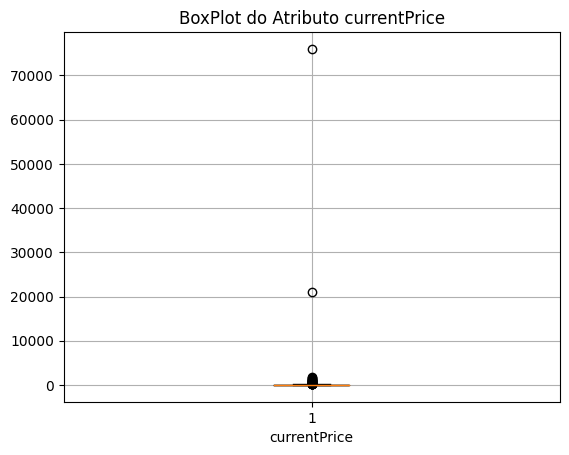

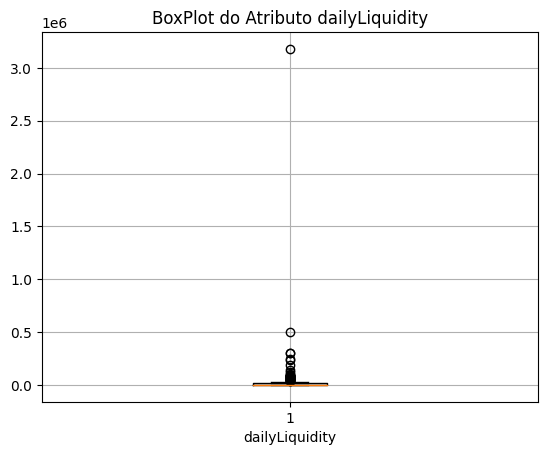

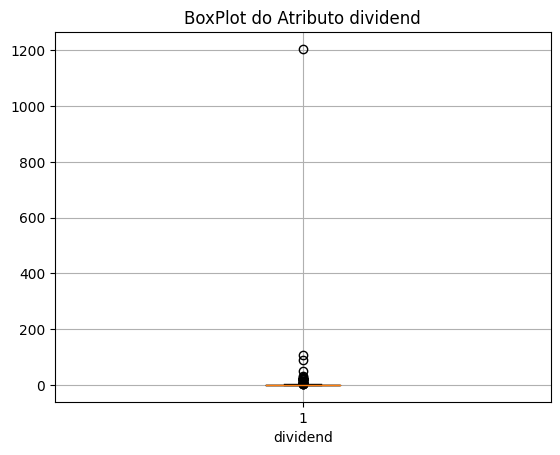

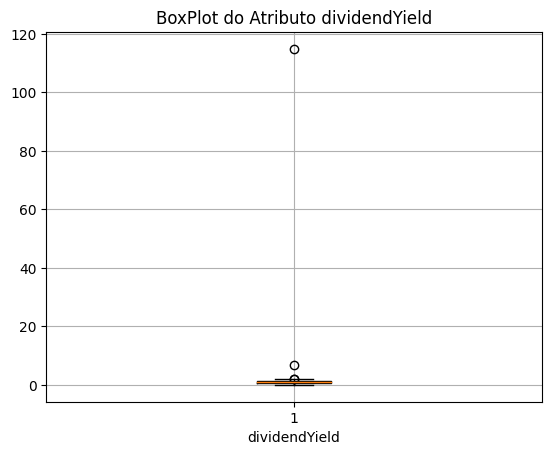

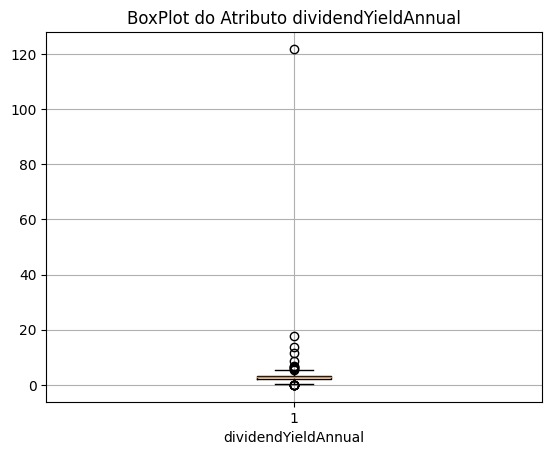

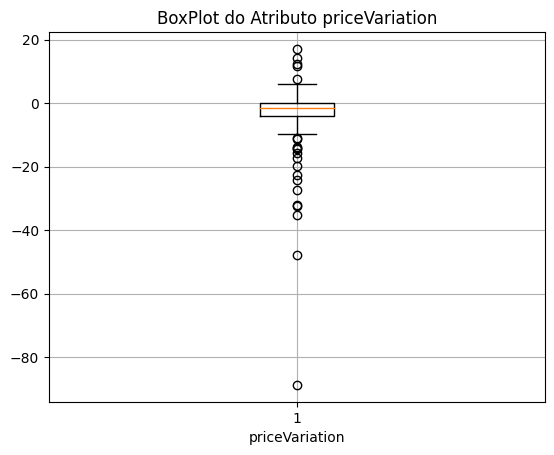

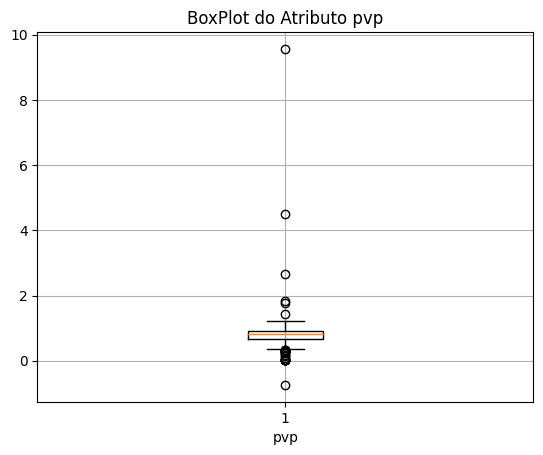

In [30]:
# Utilizando o BoxPlot Para Identificar Atributos Com Outliers.

# Varrendo os Atributos Quantitativos do DataFrame Com Outlier.
for attribute in outliers:

    plt.boxplot(dfClean[attribute])

    plt.title(f'BoxPlot do Atributo {attribute}')
    plt.xlabel(f'{attribute}')

    plt.grid()
    plt.show()

- # Tratando Atributos com Registros Outliers.
- - # Substituição Dos Valores Discrepantes Pelo Valor da Mediana do Atributo.
- - O método utilizado para o tratamento de outliers é o de `Substituição Dos Valores Discrepantes Pelo Valor da Mediana do Atributo`.
- - Utilizamos esse método póis ao substituir os valores outliers pela mediana, a distribuição dos dados é menos afetada pelos valores extremos, preservando assim a estrutura da distribuição original.

In [31]:
# Utilizando a Substituição Dos Valores Discrepantes Pelo Valor da Mediana do Atributo.

# Varrendo os Atributos Quantitativos do DataFrame.
for column in dfClean.columns[2:]:

    median = dfClean[column].median()

    q1 = dfClean[column].quantile(0.25)
    q3 = dfClean[column].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    dfClean[column] = dfClean[column].apply(lambda item: 0.0 if item < lower else median if item > upper else item)

- - # BoxPlot
- - Analise do `Box Plot` após o tratamento de `outliers`.
- - É possivel analisar as mudaças sofridas no DataFrame com o uso do Box Plot após o tratamento de outliers.

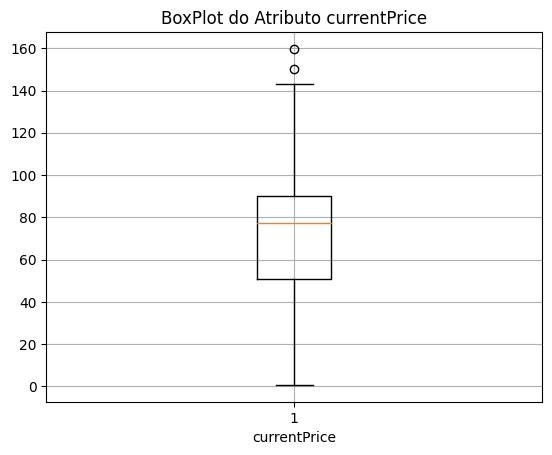

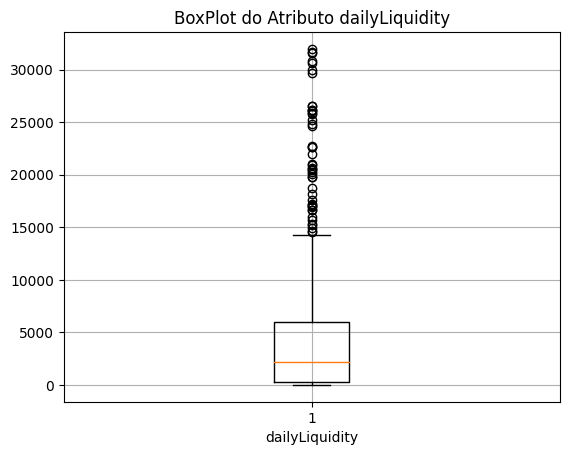

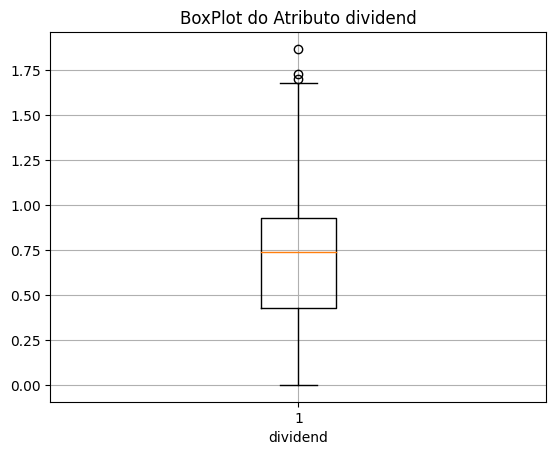

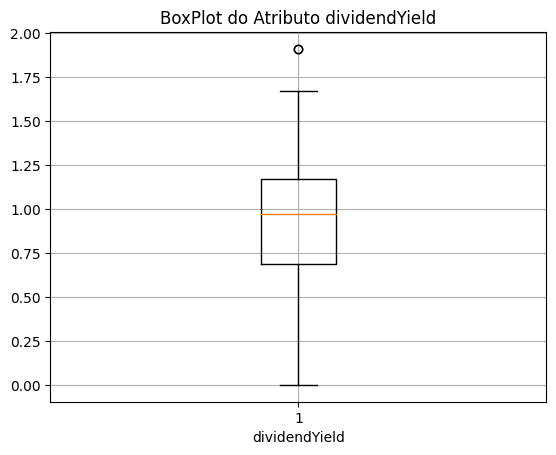

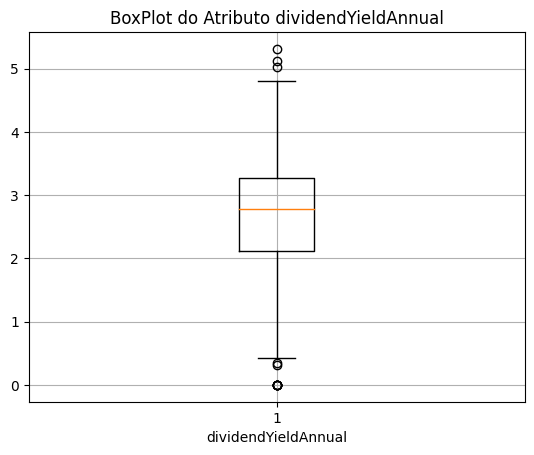

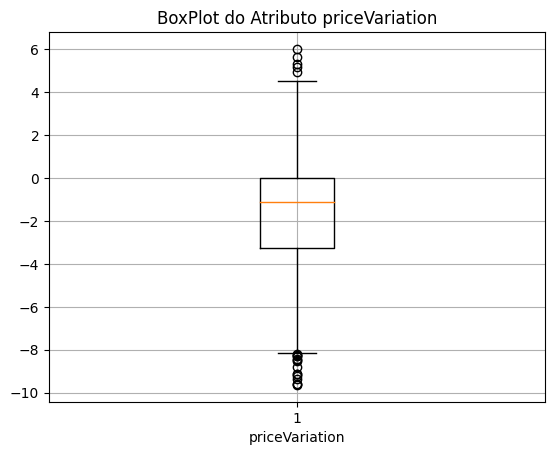

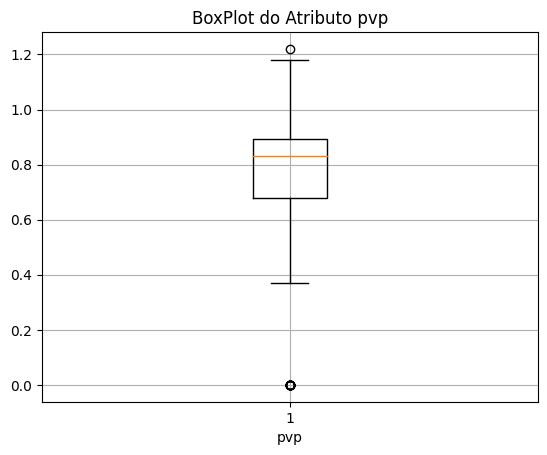

In [32]:
# Utilizando o BoxPlot Para Identificar Atributos Com Outliers.

# Varrendo os Atributos Quantitativos do DataFrame Com Outlier.
for attribute in outliers:

    plt.boxplot(dfClean[attribute])

    plt.title(f'BoxPlot do Atributo {attribute}')
    plt.xlabel(f'{attribute}')

    plt.grid()
    plt.show()

In [33]:
# Exportando o DataFrame de Treinamento Finalizado.

dfClean.to_csv('../bases tratadas/funds.csv', index=False)